In [2]:
import pandas as pd
import numpy as np 
import re   
import warnings
warnings.filterwarnings('ignore')  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('tarantino_csv.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [47]:
dff=df.loc[df['type']=='word'] 
top_5 = dff['word'].value_counts()[:5]

dff=df.loc[df['word'].isin(top_5.index)] 
dff

g=dff.groupby(['movie','word'], as_index=False).count()
g


,movie,word,type,minutes_in
0,django unchained,ass,28,28
1,django unchained,fuck,8,8
2,django unchained,fucking,15,15
3,django unchained,n-word,114,114
4,django unchained,shit,17,17
5,inglorious basterds,ass,6,6
6,inglorious basterds,fuck,11,11
7,inglorious basterds,fucking,9,9
8,inglorious basterds,shit,3,3
9,jackie brown,ass,52,52


<AxesSubplot:xlabel='movie', ylabel='type'>

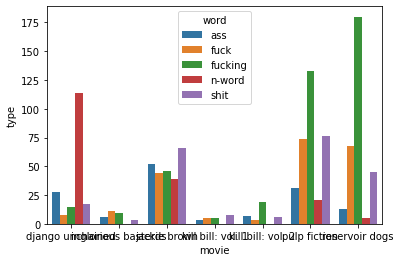

In [55]:
sns.barplot(data=g, x='movie', y='type', hue='word') 

In [34]:
dff=df.loc[df['type']=='word']
dff['word'].value_counts()

fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
motherfuckers     15
bullshit          15
dick              14
pussy             11
bastard           10
asshole           10
bitches            9
fucker             8
negro              5
dicks              5
assholes           5
asses              4
shitty             4
damned             3
shithead           3
fucks              3
cocksucker         2
wetback            2
cunt               2
horseshit          2
gooks              2
japs               2
shitload           2
goddamned          1
fuckup             1
gook               1
asshead            1
squaw              1
jackass            1
cunts              1
chickenshit        1
fuckface           1
cockblockery       1
shitting           1
dickless           1
jew (verb)   

<AxesSubplot:xlabel='minutes_in', ylabel='Count'>

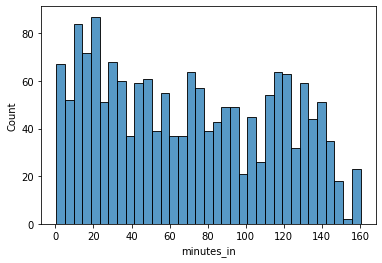

In [28]:
sns.histplot(data=df.loc[df['type']=='word'], x="minutes_in", bins=35 )